#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#### Function below will generate uniformly distributed points along with uniformly distributed labels.
#### The labels are 0 or 1 and points are between 0 and 1

In [2]:
def ph(n):
    np.random.seed(20)
    x1 = np.random.uniform(0,1,n) #Generate uniformly distributed x1
    x2 = np.random.uniform(0,1,n) #Generate uniformly distributed x2
    y  = np.random.uniform(0, 2, n).astype(int) #Generate uniformly distributed y (either 0 or 1)
    df = pd.DataFrame(list(zip(x1, x2,y)),columns=['X1','X2','y']) # save x1,x2,y as dataframe
    return df #return dataframe

In [3]:
df = ph(100) # generate data with 100 points

In [4]:
X, Y = np.mgrid[0:1:0.002,0:1:0.002] # this will be used for plot
new_df = pd.DataFrame(list(zip(X.flatten(), Y.flatten())),columns=['X1','X2']) #above points are converted to data frame by flattening the generated array

#### Below function generates indices of nearest neighbours from training data

In [5]:
def sort_index(lst, rev=False): #arguments is a list which will be act as an input
    index = range(len(lst)) #index will be used below for the loop using lambda function
    s = sorted(index, reverse=rev, key=lambda i: lst[i]) # this will generate list of indices that contain nearest neighbours in descending order 
    return s # returns list

In [6]:
nearest_points = [] #create an empty list which will store nearest points
result=[] # result will be used create a new column with classified labels
for index, row in new_df.iterrows(): #run through every point of dataframe
    point1 = np.array([row['X1'], row['X2']]) #save the point here
    for i, r in df.iterrows(): #iterate over actual training points
        
        point2 = (np.array([r['X1'], r['X2']])) # save the point from training data
        nearest_points.append(np.linalg.norm(point2-point1,ord=2)) #calculate euclidean distance of every point

    top3= sort_index(nearest_points)[:3] # select top 3 neighbours with minimum distance and save their indexes
    neighbour_sum=0 # initialise eighbour sum to 0
    for j in top3: #iterate through every top 3
        neighbour_sum=neighbour_sum+df.iloc[j,2] #voting begings
    if(neighbour_sum>1): #make necessary changes to the label of training data for y label
        result.append(1)
        #new_df.iloc[index,2]==1
    else:
        (result.append(0))   # else training data is 0
    nearest_points = []    
new_df['y']=result   # save the new data points

#### Below is graph of uniformly distributed points along with their labels

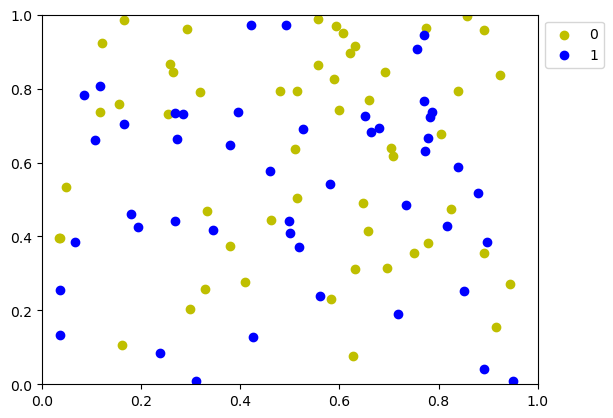

In [7]:
fig, ax = plt.subplots()

ax.scatter(df[df['y']==0]['X1'],df[df['y']==0]['X2'],c='#bfbf00')
ax.scatter(df[df['y']==1]['X1'],df[df['y']==1]['X2'],c='#0000ff')

ax.legend(['0','1'],bbox_to_anchor=(1, 1))
plt.ylim(0,1)
plt.xlim(0,1)

plt.show()
fig.savefig("figure6i.png")

#### This is the required plot with decision boundary

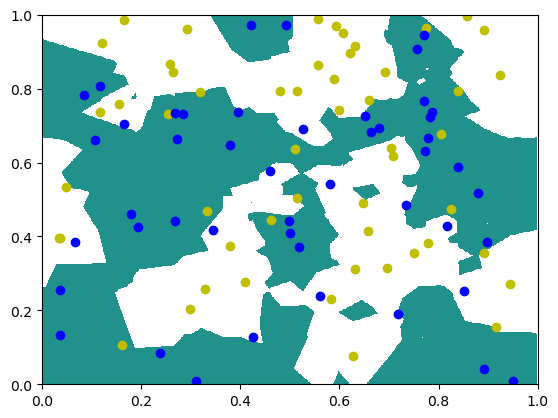

In [8]:
cmap=ListedColormap(['#ffffff','#21918c']) # the colors inside the function have been sample from the PDF of question paper and their hexcodes have been found using photoshop
fig, ax = plt.subplots()
ax.pcolormesh(X,Y,new_df['y'].values.reshape(X.shape), cmap=cmap)


ax.scatter(df[df['y']==0]['X1'],df[df['y']==0]['X2'],c='#bfbf00')
ax.scatter(df[df['y']==1]['X1'],df[df['y']==1]['X2'],c='#0000ff')
plt.ylim(0,1)
plt.xlim(0,1)

plt.show()
fig.savefig("figure6ii.png") # save as png
